#**Desafio: Probabilidade e Amostragem**

### Importação das bibliotecas

In [ ]:
### para manipulação dos dados em python
import pandas as pd
import numpy as np

### para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt

### bibliotecas para estatística
import scipy.stats as stats
import math



---



##**Desafio 1: Entendendo o Consumidor**

### Abrindo e lendo o arquivo

Clicar no link e baixar o arquivo na sua máquina: https://drive.google.com/file/d/1EHiD_jSQ_vJ8iSN189qCrd1AT3FaWrdA/view?usp=sharing

In [ ]:
#Após rodar o código, clique em "Escolher arquivos" para importar o arquivo que você baixou
from google.colab import files
uploaded = files.upload()

Saving desafio_01_consumidor.csv to desafio_01_consumidor.csv


In [ ]:
df_consumidor = pd.read_csv("desafio_01_consumidor.csv", sep = ",")
df_consumidor.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


In [ ]:

df_consumidor.shape

(203, 6)

In [ ]:
df_consumidor.dtypes

,0
id_cliente,object
idade,int64
renda,int64
produto,object
regiao-BR,object
pre-pandemia,int64


In [ ]:
df_consumidor.describe()

,idade,renda,pre-pandemia
count,203.000000,203.000000,203.000000
mean,42.403941,11586.364532,0.497537
std,14.400715,6288.016708,0.501230
min,15.000000,110.000000,0.000000
25%,31.000000,6705.000000,0.000000
50%,41.000000,11145.000000,0.000000
75%,53.000000,15590.500000,1.000000
max,80.000000,30000.000000,1.000000




---



Suponha que você trabalha em uma empresa de produtos de beleza populares e, com a pandemia, você suspeita que o perfil de seus clientes mudou. O time de marketing, pediu a sua ajuda e gostaria de entender se:

1. Isso de fato aconteceu?

2. Quais as diferenças do novo perfil de clientes para o antigo, pois assim poderiam personalizar melhor os seus anúncios.

Para isso, eles te enviaram a base de dados (desafio_01_consumidor.csv). Como você poderia ajudá-los?


Para responder esse desafio:
A base de dados: desafio_01_consumidor.csv contém informações de seus clientes (anonimizados) no período pré e pós pandemia. A coluna "pré-pandemia" indica se o dado é pré-pandemia ou não, sendo 1, caso positivo ou 0 caso negativo.

### **Exercício 1**

1. Entenda a distribuição de variáveis como de idade / renda / região /
produtos mais comprados antes e depois da pandemia

  a. Identifique as distribuições

  b. Plote histogramas / boxplots

In [ ]:
#A coluna "pré-pandemia" indica se o dado é pré-pandemia ou não, sendo 1, caso positivo ou 0 caso negativo.
df_consumidor['pre-pandemia'].value_counts()

,count
pre-pandemia,
0,102
1,101


In [ ]:
df_pre_pandemia = df_consumidor[df_consumidor['pre-pandemia'] == 1]
df_pos_pandemia = df_consumidor[df_consumidor['pre-pandemia'] == 0]

###Análise por Idade

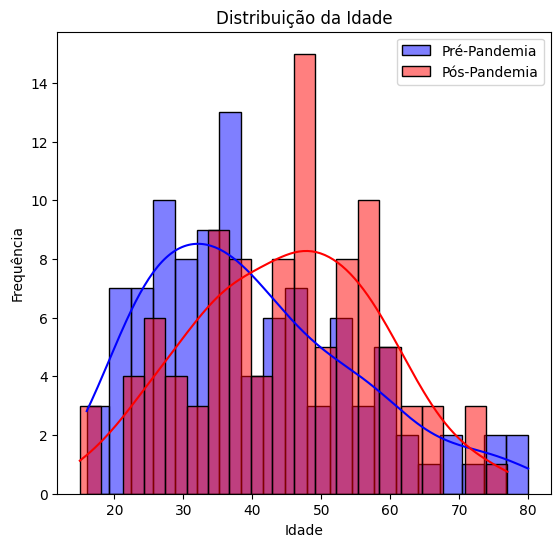

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_pre_pandemia['idade'], bins = 20, color = 'blue', kde = True, label = 'Pré-Pandemia')
sns.histplot(df_pos_pandemia['idade'], bins = 20, color = 'red', kde = True, label = 'Pós-Pandemia')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend()

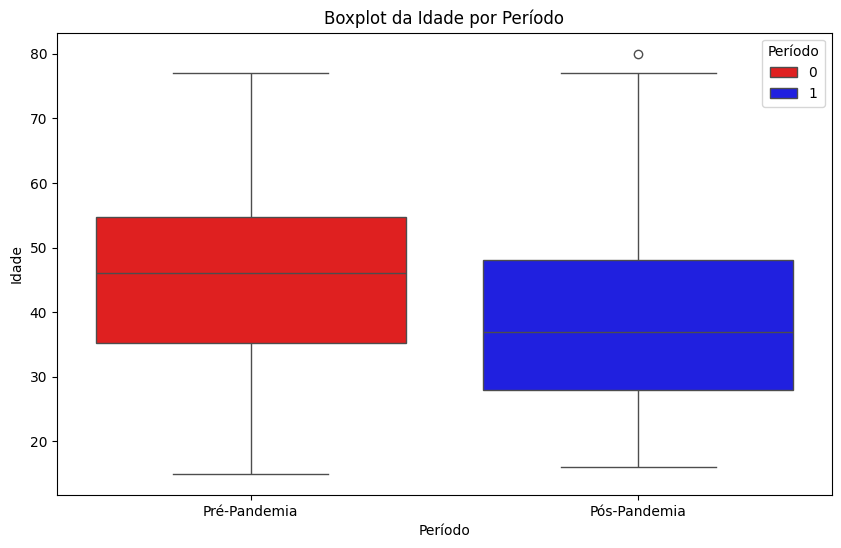

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_consumidor, x = 'pre-pandemia', y = 'idade', hue = 'pre-pandemia', palette = {1: 'blue', 0: 'red'})
plt.title('Boxplot da Idade por Período')
plt.xlabel('Período')
plt.ylabel('Idade')
plt.xticks(ticks = [0, 1], labels = ['Pré-Pandemia', 'Pós-Pandemia'])
plt.legend(title='Período')
plt.show()

###Análise por Renda

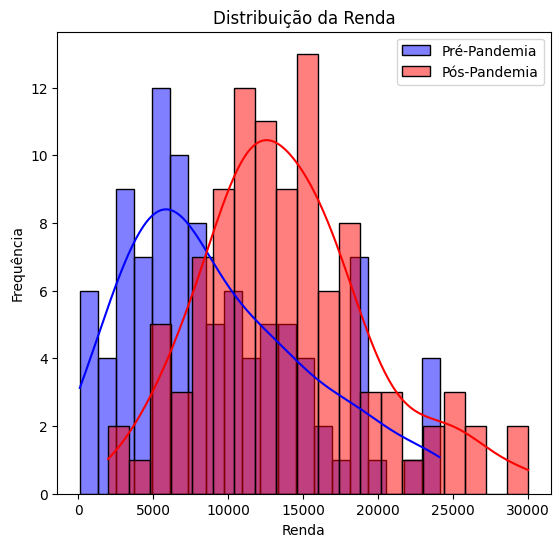

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_pre_pandemia['renda'], bins = 20, color = 'blue', kde = True, label = 'Pré-Pandemia')
sns.histplot(df_pos_pandemia['renda'], bins = 20, color = 'red', kde = True, label = 'Pós-Pandemia')
plt.title('Distribuição da Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.legend()

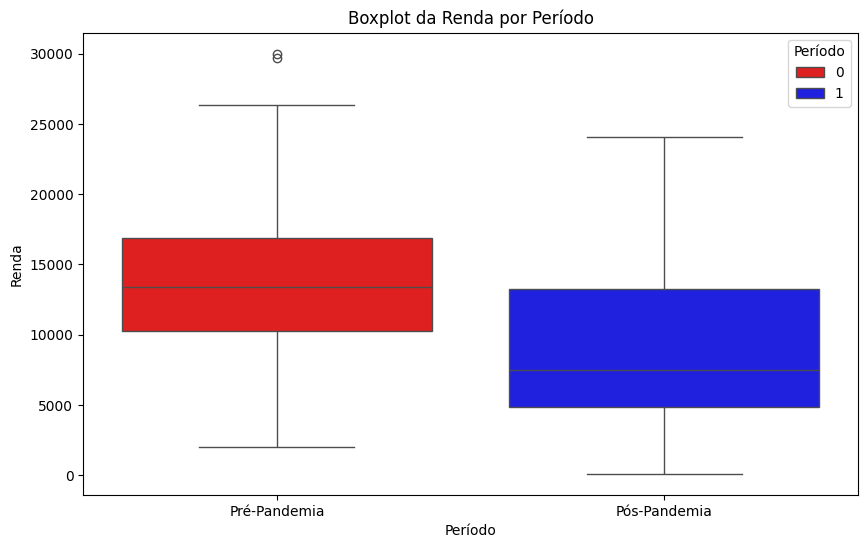

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_consumidor, x = 'pre-pandemia', y = 'renda', hue = 'pre-pandemia', palette = {1: 'blue', 0: 'red'})
plt.title('Boxplot da Renda por Período')
plt.xlabel('Período')
plt.ylabel('Renda')
plt.xticks(ticks = [0, 1], labels = ['Pré-Pandemia', 'Pós-Pandemia'])
plt.legend(title = 'Período')
plt.show()

###Análise por Região

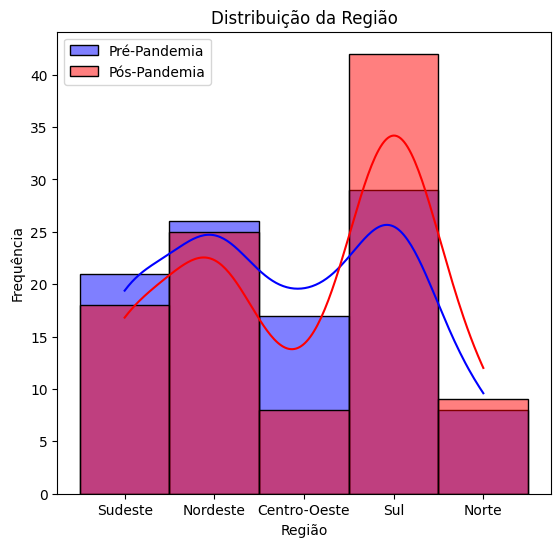

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_pre_pandemia['regiao-BR'], bins = 20, color = 'blue', kde = True, label = 'Pré-Pandemia')
sns.histplot(df_pos_pandemia['regiao-BR'], bins = 20, color = 'red', kde = True, label = 'Pós-Pandemia')
plt.title('Distribuição da Região')
plt.xlabel('Região')
plt.ylabel('Frequência')
plt.legend()

###Análise por Produtos

In [ ]:
df_consumidor['produto'].unique()

array(['batom', 'desodorante', 'sombra', 'perfume', 'antissinais', 'base'],
      dtype=object)

In [ ]:
df_consumidor['produto'].value_counts()

,count
produto,
batom,76
desodorante,66
antissinais,29
sombra,13
perfume,12
base,7


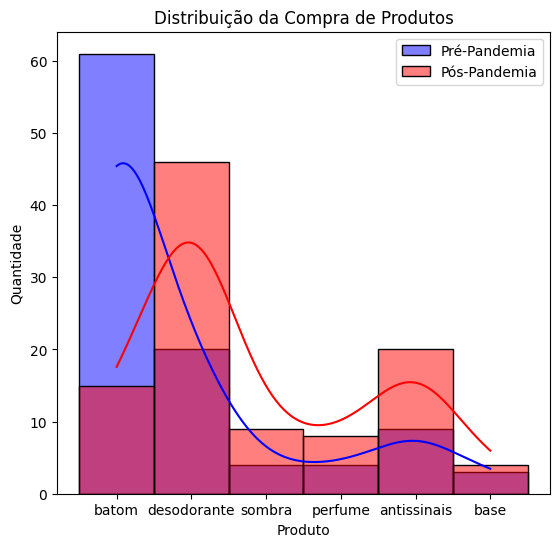

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_pre_pandemia['produto'], bins = 20, color = 'blue', kde = True, label = 'Pré-Pandemia')
sns.histplot(df_pos_pandemia['produto'], bins = 20, color = 'red', kde = True, label = 'Pós-Pandemia')
plt.title('Distribuição da Compra de Produtos')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.legend()

Através da análise dos gráficos plotados acima, podemos verificar uma diferença significativa no perfil dos clientes.

Podemos considerar que Pós-Pandemia houve:
- aumento considerável de clientes com idades entre 35 e 55 anos;
- aumento de vendas na região Sul e Norte;
- queda de vendas no Sudeste, Nordeste e Centro-Oeste;
- maior número de clientes com rendas entre 10.000 e 20.000;
- diminuição drástica na venda de batons;
- aumento considerável na venda de desodorante, sombra, perfume e antissinais.



---



### **Exercício 2**

2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia
provar estatisticamente que essas diferenças são significativas? (pergunta
extra)

In [ ]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(df_pre_pandemia['idade'], df_pos_pandemia['idade'])
print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: -2.5162646871061667, p-value: 0.01264248733730923


Utilizando o teste t de student para comparar médias de duas amostras de idades dos cliente em período Pré e Pós-pandemia, chegamos a um resultado onde **p-value < 0,05**, logo significando que há uma diferença estatisticamente significativa entre os períodos Pré e Pós-pandemia.



---



### **Exercício 3**

3. Suponha agora que os dados recebidos são somente uma amostra da sua
população total de clientes. Suponha que a sua "população" de clientes
verdadeira é de 100.000. Qual o tamanho da amostra necessária para
chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A
base informada é suficiente? E com uma margem de erro de 10%?



---



######Para calcular o tamanho da amostra necessário, você pode usar a fórmula para o tamanho da amostra para uma proporção:

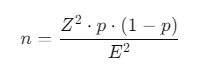

onde:

*   Z é o valor da distribuição normal padrão para o nível de confiança (1,96 para 95% de confiança)
*   p é a proporção esperada (suponha 0,5 se não souber)
*   E é a margem de erro





---



In [ ]:
# Calculando o tamanho da amostra necessária
def calcular_tamanho_amostra(p, E, Z = 1.96):
    n = (Z ** 2 * p * (1 - p)) / (E ** 2)
    return math.ceil(n)

# Tamanho da amostra para 2% de margem de erro
n_2 = calcular_tamanho_amostra(p = 0.5, E = 0.02)
print(f'Tamanho da amostra necessário para 2% de margem de erro: {n_2}.')

# Tamanho da amostra para 10% de margem de erro
n_10 = calcular_tamanho_amostra(p = 0.5, E = 0.10)
print(f'Tamanho da amostra necessário para 10% de margem de erro: {n_10}.')

Tamanho da amostra necessário para 2% de margem de erro: 2401.
Tamanho da amostra necessário para 10% de margem de erro: 97.


In [ ]:
# Suposição do tamanho da amostra fornecida
n_atual = len(df_consumidor)

print(f'Tamanho da amostra fornecida: {n_atual}. \n')
print(f'A amostra fornecida é suficiente para 2% de margem de erro? {"Sim" if n_atual >= n_2 else "Não"}')
print(f'A amostra fornecida é suficiente para 10% de margem de erro? {"Sim" if n_atual >= n_10 else "Não"}')

Tamanho da amostra fornecida: 203. 

A amostra fornecida é suficiente para 2% de margem de erro? Não
A amostra fornecida é suficiente para 10% de margem de erro? Sim




---



---



---



##**Desafio 2: Determinando o Estoque de Segurança**

###Abrindo e lendo o arquivo

Clicar no link e baixar o arquivo na sua máquina: https://drive.google.com/file/d/1wSf1I8BBOksWkHGVVZrn60UbjSJTFvQS/view?usp=sharing

In [ ]:
#Após rodar o código, clique em "Escolher arquivos" para importar o arquivo que você baixou
from google.colab import files
uploaded = files.upload()

Saving desafio_02_estoque.csv to desafio_02_estoque.csv


In [ ]:
df_estoque = pd.read_csv("desafio_02_estoque.csv", sep = ",")
df_estoque.head()

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5


In [ ]:
df_estoque.shape

(370, 3)

In [ ]:
df_estoque.dtypes

,0
data,object
vendas-iogurte,int64
lead-time,int64


In [ ]:
df_estoque.describe()

,vendas-iogurte,lead-time
count,370.000000,370.000000
mean,4999.170270,5.094595
std,77.285068,1.578728
min,4811.000000,1.000000
25%,4947.000000,4.000000
50%,4996.000000,5.000000
75%,5054.000000,6.000000
max,5233.000000,9.000000




---



Suponha agora que você trabalha em uma empresa de produtos perecíveis, como
Danone ou Nestlé. Para a empresa, é muito importante que a sua política de estoque seja eficiente. É necessário manter um estoque de segurança em todos os produtos (acima da previsão de vendas), pois, caso contrário, as pessoas podem não encontrar os produtos no supermercado. Mas, ao mesmo tempo, se o estoque estiver em excesso, isso pode representar um grande custo. Os produtos podem não ser comprados, e consequentemente, jogados fora, o que na indústria se chama "desova".

Para achar o equilíbrio perfeito, o gerente de vendas pediu a ajuda a você, do time de análise de dados, e ele gostaria de saber qual o estoque de segurança ideal.

Mais informações sobre conceitos importantes da indústria: https://drive.google.com/file/d/1hFABtiB4uVd7_UCNz9IfuR6CFYmzFdWa/view?usp=sharing

O gerente de vendas te enviou o arquivo desafio_02_estoque.csv contendo os
dados de vendas de iogurte e o lead time de 2015 a 2022.

###**Exercício 1**

1. Analise os dados das vendas e do lead time. Eles seguem uma distribuição
normal? Que características você identificou para chegar a essa conclusão?

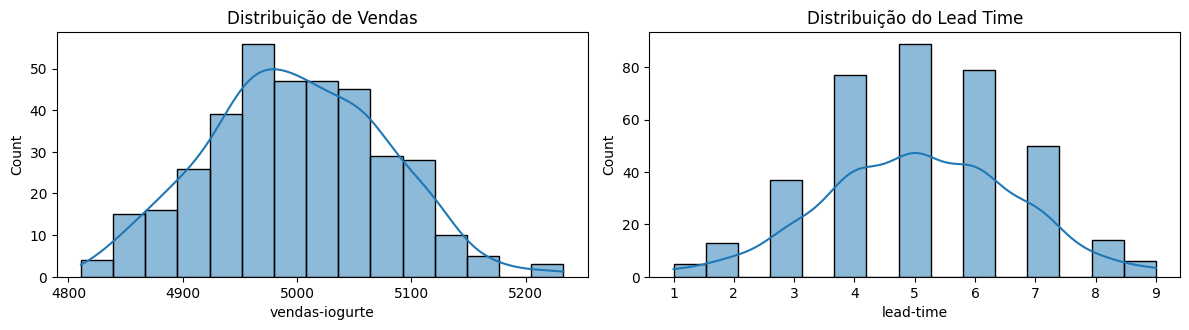


Notamos que a distribuição das vendas é normal por apresentar a forma de sino simétrica, característico de uma distribuição normal.
Notamos que a distribuição do leadtime não é normal por não apresentar a forma de sino simétrica, característico de uma distribuição normal.


In [ ]:
# Para verificar se os dados seguem uma distribuição normal, podemos utilizar histogramas, Q-Q plots e testes de normalidade como o teste de Shapiro-Wilk.
'''
Um histograma com uma curva de densidade sobreposta pode fornecer uma boa visualização da distribuição dos dados.
Para uma distribuição normal, o histograma deve se aproximar de uma forma de sino (bell-shaped curve).
'''

# Histogramas
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df_estoque['vendas-iogurte'], kde=True)
plt.title('Distribuição de Vendas')

plt.subplot(2, 2, 2)
sns.histplot(df_estoque['lead-time'], kde=True)
plt.title('Distribuição do Lead Time')

plt.tight_layout()
plt.show()

print("\nNotamos que a distribuição das vendas é normal por apresentar a forma de sino simétrica, característico de uma distribuição normal.")
print("Notamos que a distribuição do leadtime não é normal por não apresentar a forma de sino simétrica, característico de uma distribuição normal.")



---



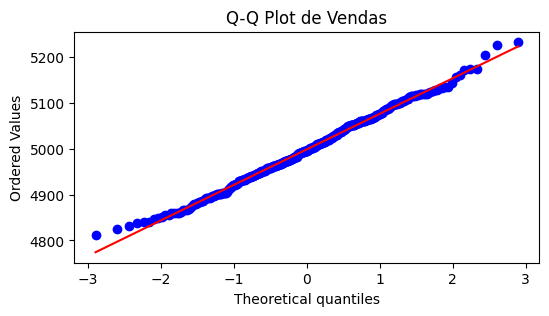

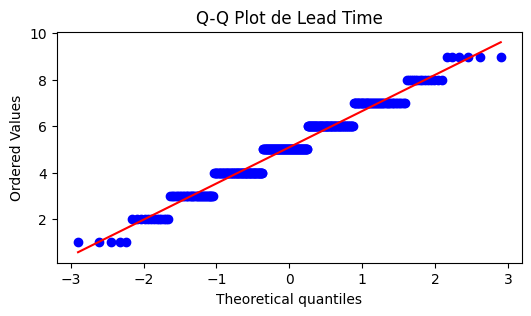


Notamos que a distribuição das vendas é normal por apresentar os pontos se alinhando aproximadamente em uma linha reta, característico de uma distribuição normal.
Notamos que a distribuição do leadtime não é normal por não apresentar os pontos se alinhando aproximadamente em uma linha reta, característico de uma distribuição normal.


In [ ]:
# Q-Q Plot para vendas
'''
O Q-Q plot compara os quantis dos dados com os quantis teóricos de uma distribuição normal.
Se os pontos estiverem próximos da linha reta, a distribuição dos dados é aproximadamente normal.
'''
plt.figure(figsize=(6, 3))
stats.probplot(df_estoque['vendas-iogurte'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot de Vendas')
plt.show()

# Q-Q Plot para lead time
plt.figure(figsize=(6, 3))
stats.probplot(df_estoque['lead-time'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot de Lead Time')
plt.show()

print("\nNotamos que a distribuição das vendas é normal por apresentar os pontos se alinhando aproximadamente em uma linha reta, característico de uma distribuição normal.")
print("Notamos que a distribuição do leadtime não é normal por não apresentar os pontos se alinhando aproximadamente em uma linha reta, característico de uma distribuição normal.")

In [ ]:
# Testes de normalidade
'''
O teste de Shapiro-Wilk é um teste de normalidade que avalia a hipótese nula de que os dados vêm de uma distribuição normal.
Se o valor p for maior que o nível de significância (geralmente 0,05), não há evidências suficientes para rejeitar a hipótese de normalidade.
'''

stat_vendas, p_vendas = stats.shapiro(df_estoque['vendas-iogurte'].dropna())
stat_lead_time, p_lead_time = stats.shapiro(df_estoque['lead-time'].dropna())
print(f"Teste de Shapiro-Wilk para Vendas: p-value = {p_vendas}")
print(f"Teste de Shapiro-Wilk para Lead Time: p-value = {p_lead_time}")

print("\nA distribuição das vendas é normal." if p_vendas > 0.05 else "A distribuição das vendas não é normal.")
print("A distribuição do lead time é normal." if p_lead_time > 0.05 else "A distribuição do lead time não é normal.")

Teste de Shapiro-Wilk para Vendas: p-value = 0.34418094488575024
Teste de Shapiro-Wilk para Lead Time: p-value = 7.123578589864982e-08

A distribuição das vendas é normal.
A distribuição do lead time não é normal.


###**Exercício 2**

2. Assuma que:

a. Os dados seguem uma distribuição normal.

b. O time de vendas utilize para o produto em questão o nível de serviço
de 99,87%

c. O produto não tem sazonalidade (todos os meses vende valores
próximos) e a demanda média passada é uma boa estimativa para a
projetada, de acordo com o time de planejamento de demanda.

Calcule, com os dados fornecidos, o estoque de segurança desejado.

In [ ]:
# Estatísticas para vendas
media_vendas = round((df_estoque['vendas-iogurte'].mean()), 2)
desvio_padrao_vendas = round((df_estoque['vendas-iogurte'].std()), 2)

# Estatísticas para lead time
media_lead_time = round((df_estoque['lead-time'].mean()), 2)
desvio_padrao_lead_time = round((df_estoque['lead-time'].std()), 2)

print(f'Média de vendas: {media_vendas}.')
print(f'Desvio padrão das vendas: {desvio_padrao_vendas}.\n')

print(f'Média do lead time: {media_lead_time}.')
print(f'Desvio padrão do lead time: {desvio_padrao_lead_time}.')

Média de vendas: 4999.17.
Desvio padrão das vendas: 77.29.

Média do lead time: 5.09.
Desvio padrão do lead time: 1.58.


In [ ]:
# Valor Z para 99,87% de nível de serviço
z = stats.norm.ppf(0.9987)
print(f'Valor Z para 99,87% de nível de serviço: {z}')

Valor Z para 99,87% de nível de serviço: 3.011453758499792




---



######Fórmula de cálculo do estoque de segurança
Como o desvio padrão do lead time é baixo, ou seja, os dados estão próximos da média e possuem pouca variabilidade. O cálculo do estoque de segurança será

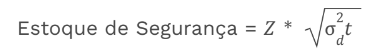

Onde:
* Z = o valor da tabela da distribuição normal, que indica a quantos desvios
padrões ao redor da média temos que tomar para cobrir a proporção da
área sob a curva normal /nível de serviço desejado.
* σd = desvio padrão / variação da demanda
* t = lead time médio



---



In [ ]:
# Calcular o estoque de segurança
estoque_seguranca = z * desvio_padrao_vendas * np.sqrt(media_lead_time)

# Arredondando para cima
estoque_seguranca = np.ceil(estoque_seguranca)
print(f'Estoque de Segurança Ideal: {estoque_seguranca}')

Estoque de Segurança Ideal: 526.0
